In [1]:
!pip install plotly chart-studio

     |████████████████████████████████| 64 kB 2.7 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=df0c11135552102dead5f4eb14439bb200d3469fbdbeed4fa0013cb313781a68
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [2]:
!pip install --upgrade plotly

     |████████████████████████████████| 28.8 MB 1.4 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


In [3]:
import numpy as np
import pandas as pd
import chart_studio.plotly  as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_csv('/content/drive/MyDrive/Colab/Mobile Price Classification_data/train.csv')
print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
# print out the features 
for i in range(0,21):
  print(data.columns[i])
print(f"number of the features : {len(data.columns)}")

battery_power
blue
clock_speed
dual_sim
fc
four_g
int_memory
m_dep
mobile_wt
n_cores
pc
px_height
px_width
ram
sc_h
sc_w
talk_time
three_g
touch_screen
wifi
price_range
number of the features : 21


In [9]:
import plotly

In [10]:
import plotly.figure_factory as ff
datahead=data.head(10)
fig = ff.create_table(datahead)
# datahead=datahead.rename(index=str, columns={"battery_power": "Battery Power", "blue": "Bluetooth","clock_speed":"Clock Speed","dual_sim":"Dual Sim","fc":"Front Camera MP",
#                                    "four_g":"4G","int_memory":"Internal Memory(GB)","m_dep":"Mobile Depth(CM)","mobile_wt":"Weight","n_cores":"Number of cores","pc":"Primary Camera MP"
#                                    ,"px_height":"Pixel R. Height","px_width":"Pixel R. Width","ram":"RAM(MB)","sc_h":"Screen Height(cm)","sc_w":"Screen Width",
#                                    "talk_time":"Longest Battery Charge","three_g":"3G","touch_screen":"Touch Screen","wifi":"WIFI","price_range":"Price Range"})
# colorscale = "Greens"
# table = ff.create_table(datahead,colorscale=colorscale,height_constant=40)
# table.layout.width=2500
# for i in range(len(table.layout.annotations)):
#     table.layout.annotations[i].font.size = 8


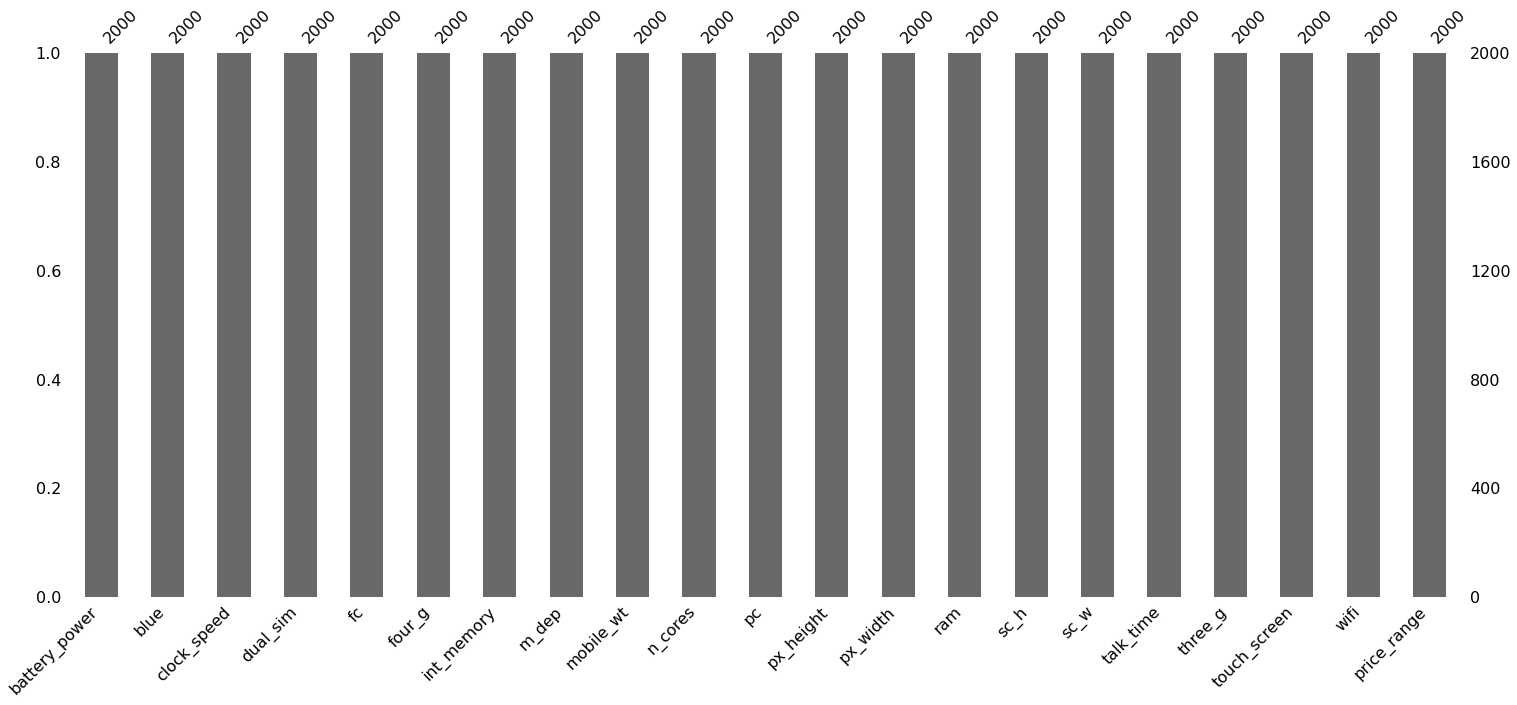

In [11]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(data)
plt.show()

In [12]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


Text(0.5, 1.0, 'Correlation ')

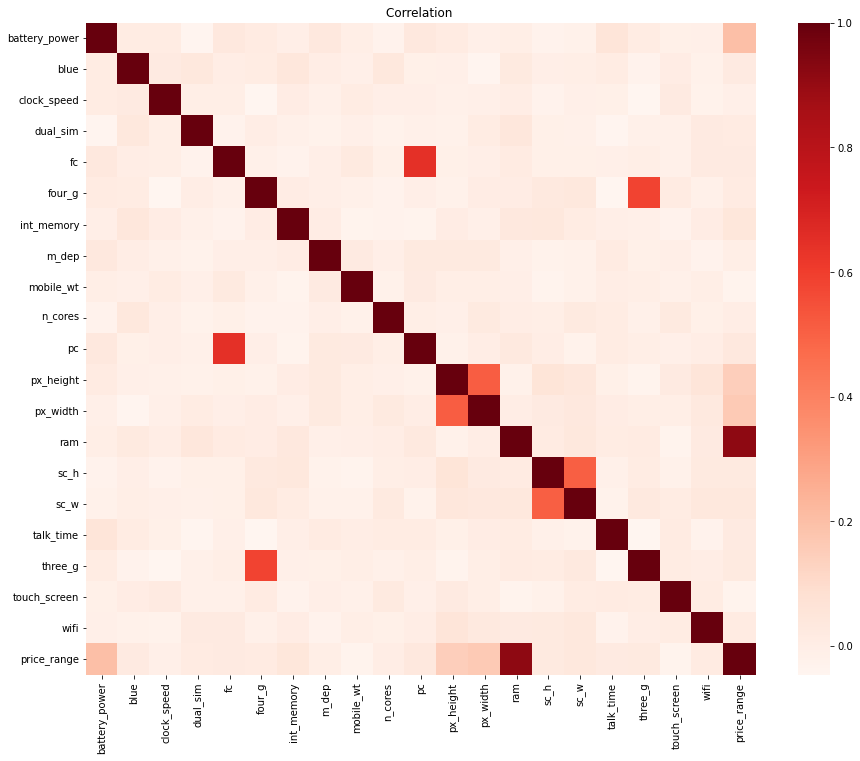

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=data.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Reds')
r.set_title("Correlation ")

In [14]:
#price range correlation
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [15]:
y = data["price_range"].values
x_data=data.drop(["price_range"],axis=1)
# x = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data,y,test_size = 0.2,random_state=3)

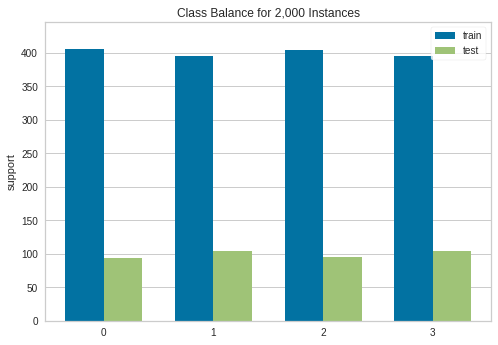

In [16]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

#SVM

In [17]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train,y_train)
print("train accuracy:",svm.score(x_train,y_train))
print("test accuracy:",svm.score(x_test,y_test))

train accuracy: 0.95375
test accuracy: 0.955


In [19]:
from sklearn.metrics import classification_report,confusion_matrix

In [20]:
y_pred_svm= svm.predict(x_test)
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        94
           1       0.97      0.93      0.95       105
           2       0.94      0.93      0.93        96
           3       0.96      0.96      0.96       105

    accuracy                           0.95       400
   macro avg       0.95      0.96      0.95       400
weighted avg       0.96      0.95      0.95       400



In [21]:
matrix=confusion_matrix(y_test,y_pred_svm)
matrix

array([[ 94,   0,   0,   0],
       [  5,  98,   2,   0],
       [  0,   3,  89,   4],
       [  0,   0,   4, 101]])

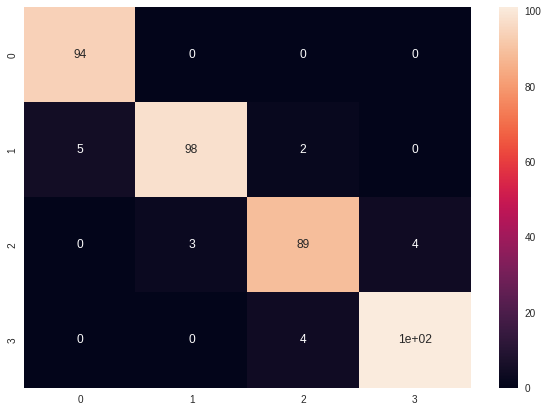

In [22]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

In [24]:
svm.score(x_test,y_test)

0.955

#KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_pred_knn= knn.predict(x_test)

ClassBalance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f5becad4490>,
             labels=[0, 1, 2, 3])

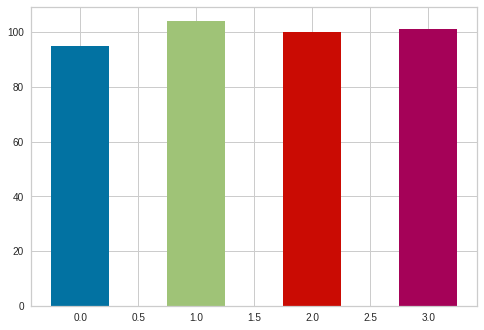

In [26]:
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_pred_knn)

In [27]:
knn.score(x_test,y_test)

0.9425

In [ ]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.94      0.93      0.94       105
           2       0.88      0.92      0.90        96
           3       0.97      0.93      0.95       105

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



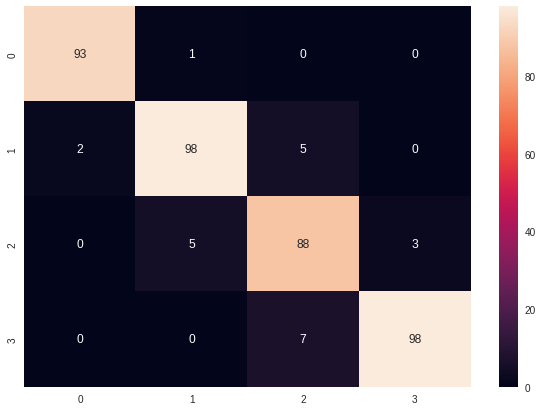

In [ ]:
matrix=confusion_matrix(y_test,y_pred_knn)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

# Elbow Method for optimum value of k 

In [29]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

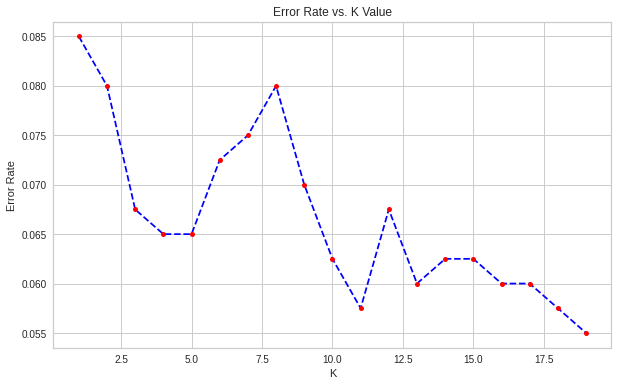

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [39]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(x_train,y_train)
y_pred_knn= knn.predict(x_test)

In [40]:
knn.score(x_test,y_test)

0.945

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree.score(x_test,y_test)

0.8175

In [ ]:
y_pred_dtree= dtree.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_dtree))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        94
           1       0.82      0.70      0.75       105
           2       0.72      0.74      0.73        96
           3       0.86      0.91      0.88       105

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



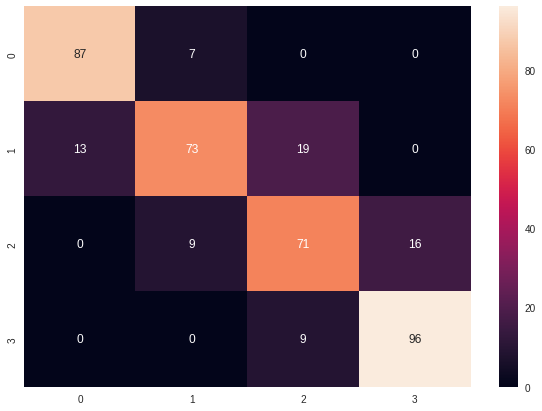

In [ ]:
matrix=confusion_matrix(y_test,y_pred_dtree)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

# Ramdom Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.score(x_test,y_test)

0.88

In [ ]:
y_pred_rfc = rfc.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        94
           1       0.88      0.80      0.84       105
           2       0.81      0.83      0.82        96
           3       0.93      0.91      0.92       105

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



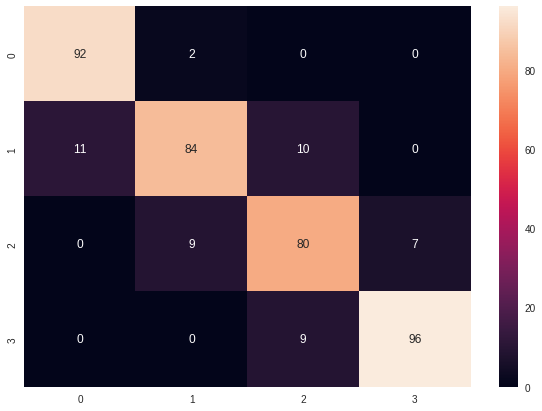

In [ ]:
matrix=confusion_matrix(y_test,y_pred_rfc)
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

#LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.



LinearRegression(n_jobs=1, normalize=False)

In [ ]:
lr.score(x_test,y_test)

0.9205767716665817

In [ ]:
y_test_lr = lr.predict(x_test)

In [ ]:
y_test_lr

array([ 1.41116129,  2.56650809,  3.12183264,  2.67631359, -0.30965973,
        2.10546642,  1.4927431 ,  1.40417134,  2.97733993,  0.53789133,
        1.77829175,  1.18495935,  0.63512249,  3.47835578,  1.42420186,
        1.06525158,  3.695162  , -0.31592564, -0.36547023,  1.45735733,
        2.35981289,  0.02451089,  0.89586534,  2.31180587,  2.08638255,
        0.28927617,  0.37091723,  1.34771625,  1.10021607,  0.23096162,
        0.31700278,  2.416883  ,  1.9146038 , -0.33127379,  1.30795725,
        2.10102299,  2.65037768,  2.23251947,  3.40059355,  2.97669259,
        0.15252653,  2.33858934,  1.14249852, -0.69746512,  0.14062292,
        0.01965979,  0.49673056, -0.18045038,  1.77192517, -0.32348465,
       -0.01170424,  0.75303609,  1.4466709 , -0.04785659, -0.2294989 ,
        3.13273185, -0.33604668,  0.49442193,  2.97028057,  1.71481804,
       -0.51515876,  2.41871717,  2.33832007,  3.00692634,  1.88293714,
        2.93790004,  1.98795992,  2.68274303,  3.14194495,  0.24

In [ ]:
y_test
y_test_rounded = np.round_(y_test_lr) 
y_test_rounded

array([ 1.,  3.,  3.,  3., -0.,  2.,  1.,  1.,  3.,  1.,  2.,  1.,  1.,
        3.,  1.,  1.,  4., -0., -0.,  1.,  2.,  0.,  1.,  2.,  2.,  0.,
        0.,  1.,  1.,  0.,  0.,  2.,  2., -0.,  1.,  2.,  3.,  2.,  3.,
        3.,  0.,  2.,  1., -1.,  0.,  0.,  0., -0.,  2., -0., -0.,  1.,
        1., -0., -0.,  3., -0.,  0.,  3.,  2., -1.,  2.,  2.,  3.,  2.,
        3.,  2.,  3.,  3.,  0.,  3., -0.,  3.,  1.,  1.,  1.,  3.,  1.,
        3.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  2.,  0.,  4.,  1.,  2.,
       -0.,  1.,  0.,  2.,  3.,  1.,  2.,  0.,  1.,  1., -1.,  1.,  0.,
        2.,  2.,  1.,  0.,  3.,  0.,  2.,  2.,  1.,  2.,  3.,  1.,  1.,
        3.,  3.,  2.,  1.,  1.,  2.,  2., -1.,  1.,  1., -0.,  3.,  0.,
        2.,  3., -0.,  3.,  1.,  2.,  3.,  1.,  0.,  2.,  2.,  1., -0.,
        1.,  1.,  3.,  1.,  3., -1., -0.,  1.,  1.,  1.,  1.,  2.,  3.,
        1.,  4.,  2.,  1.,  1.,  3.,  2.,  1., -0., -0.,  0.,  2.,  2.,
        2.,  1.,  3.,  2.,  2.,  1.,  2.,  1.,  1.,  1.,  0.,  2

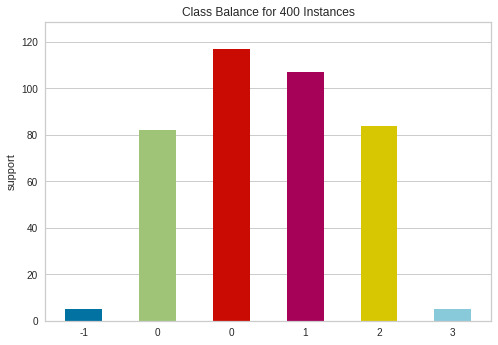

In [ ]:
from yellowbrick.target import ClassBalance
visualizer1 = ClassBalance(labels=[-1,-0,0, 1, 2,3])
visualizer1.fit(y_test_rounded)
visualizer1.poof()

#Confusion Matrix Test

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
Y_true = [0, 1, 2, 2, 2] 
Y_pred = [0, 0, 2, 2, 1]
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [ ]:
matrix=confusion_matrix(Y_true,Y_pred)
matrix

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 2]])

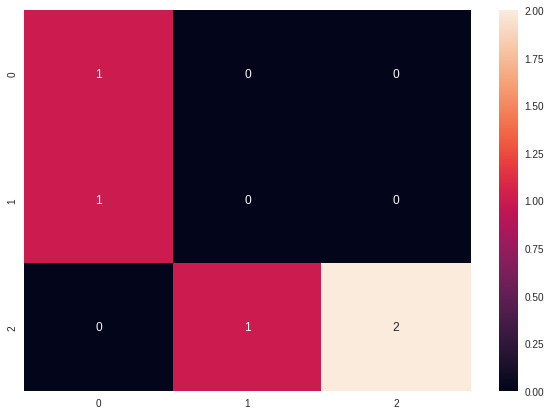

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)
# y 軸 是 ture value 
# x 軸 是 predicted value

# Price prediction of Test.csv Using KNN for Prediction

In [41]:
data_test=pd.read_csv('/content/drive/MyDrive/Colab/Mobile Price Classification_data/test.csv')

In [42]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [43]:
data_test=data_test.drop('id',axis=1)

In [44]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [45]:
predicted_price=knn.predict(data_test)

In [46]:
predicted_price

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 2, 1, 1,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 1, 0, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 2, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 3, 3, 2, 2, 1, 1, 0, 1, 2, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

# Add the predicted price to test.csv

In [47]:
data_test['price_range']=predicted_price

In [49]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
